<a href="https://colab.research.google.com/github/rraghavkaushik/Optimizers/blob/main/ADAM%5CAdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def function(x, y):
  return x^2 + y^2

In [2]:
print(function(2, 2))

4


# **Below is the algorithm proposed in the paper**

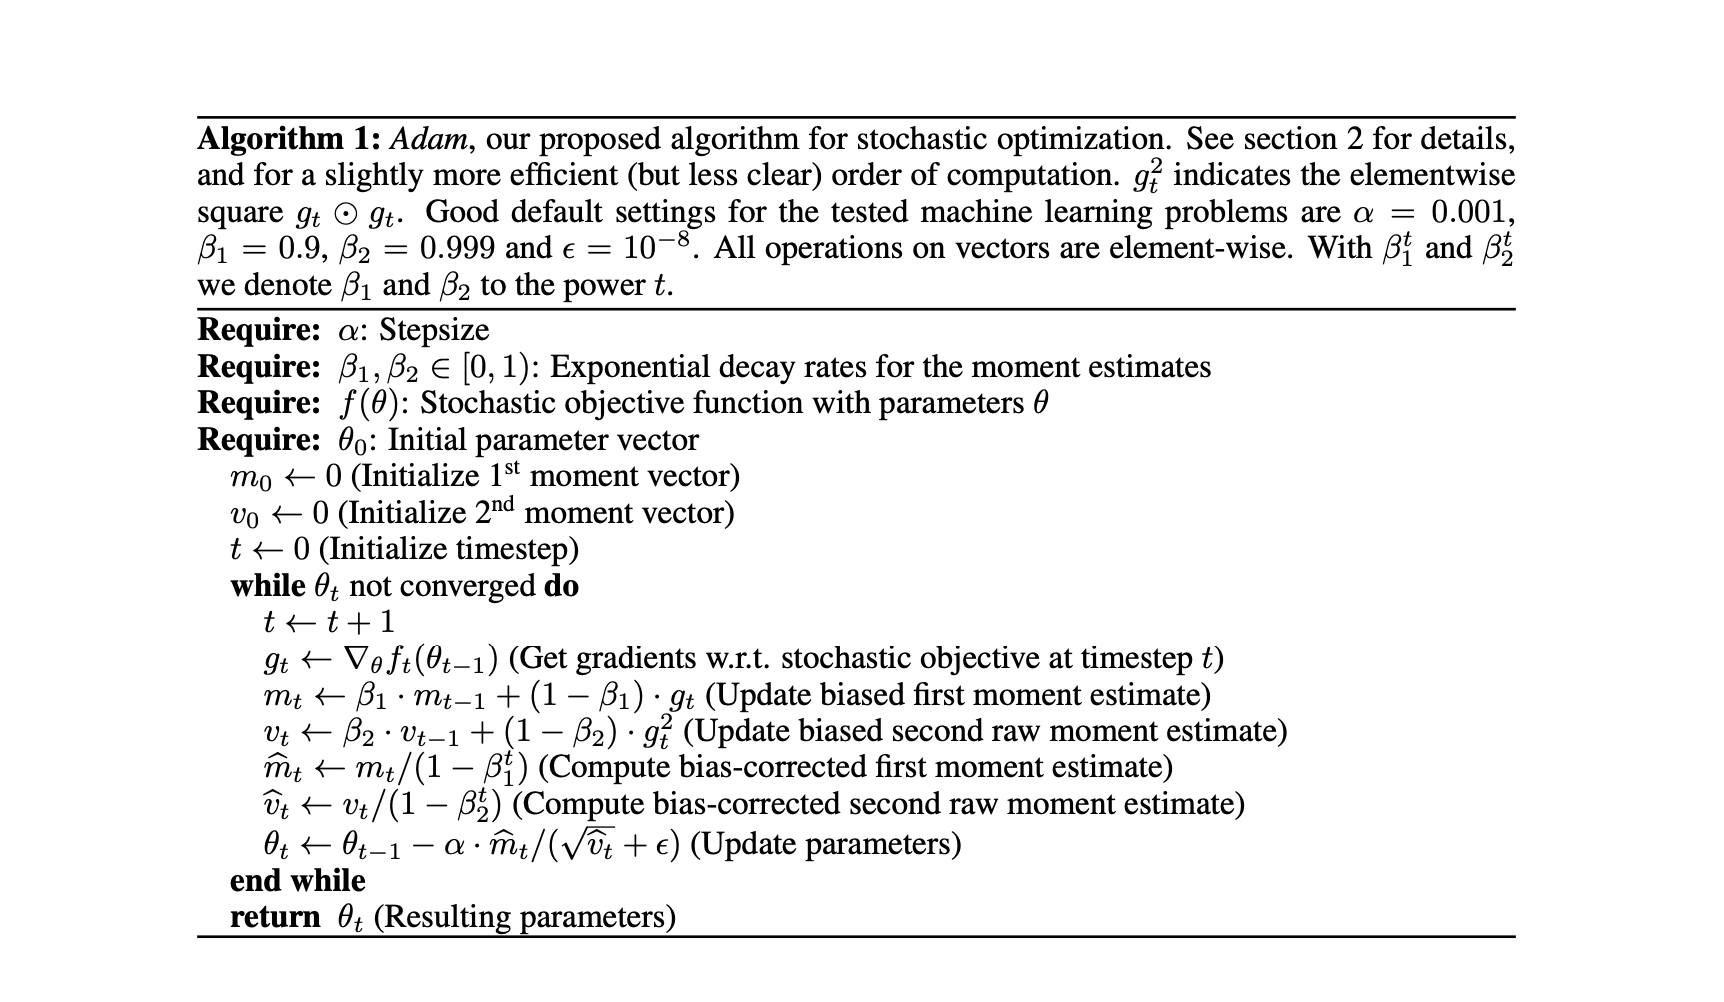

#### **Coding the gradient function**





In [7]:
import numpy as np

def forward_difference_derivative(f, x, h=1e-5):

  '''   f'(x) ≈ (f(x + h) - f(x)) / h    '''

  return (f(x + h) - f(x)) / h

def example_function(x):
    return x ** 2

x = 3.0
approx_derivative = forward_difference_derivative(example_function, x)
print("Approximate derivative at x =", x, "is", approx_derivative)


Approximate derivative at x = 3.0 is 6.000009999951316


In [5]:
import jax
import jax.numpy as jnp

def f_jax(x):
    return jnp.sum(x**2)

grad_fn = jax.grad(f_jax)

x_val = jnp.array([3.0, 4.0])
grad_val = grad_fn(x_val)

print("Gradient (JAX):", grad_val)


Gradient (JAX): [6. 8.]


In [3]:
import jax
import jax.numpy as jnp

def function(x, y):
    return x ** 2 + y ** 2

grad_fn = jax.grad(function, argnums=(0, 1))

x = 3.0
y = 4.0

grad_x, grad_y = grad_fn(x, y)
print("Gradient with respect to x:", grad_x)
print("Gradient with respect to y:", grad_y)


Gradient with respect to x: 6.0
Gradient with respect to y: 8.0


In [37]:
def function(x, y = 0):
  return x ** 2 + y ** 2

def grad(function, x, y = None, argnums = None):
  if y == None:
     y = 0

  gradi = jax.grad(function) if argnums == None else jax.grad(function, argnums)
  return gradi(x, y)

In [38]:
print(grad(function, 3.0))

6.0


### **Alogirthm**

In [32]:
class MyAdam:
    def __init__(self, alpha, beta1, beta2, theta0, epsilon):

      self.alpha = alpha
      self.beta1 = beta1
      self.beta2 = beta2
      self.theta = theta0
      self.m = 0
      self.v = 0
      self.t = 0
      self.epsilon = epsilon

    def update(self, grad):

      self.t += 1

      self.m= self.beta1 * self.m + (1 - self.beta1) * grad

      self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
      self.m_hat = self.m / (1 - self.beta1 ** self.t)

      self.v_hat = self.v / (1 - self.beta2 ** self.t)

      self.theta = self.theta - (self.alpha * self.m_hat) / (self.v_hat ** 0.5 + self.epsilon)
      return self.theta

    def run(self, grad, max_iter = 1000):

      for i in range(max_iter):

        g_t = grad(self.theta)

        self.update(g_t)
        return self.theta
